    Problem Statement:
    Build a sentiment analysis model using Recurrent Neural Networks (RNNs) to classify movie reviews from the IMDB dataset into positive or negative sentiments.
    Dataset: The dataset comprises 25,000 movie reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indices (integers). The words in the dataset are indexed by overall frequency in the dataset, allowing for quick filtering operations such as: "only onsider the top 10,000 most common words, but eliminate the top 20 most common words".

    Embedding Layer: Converts input words into dense vectors. 
    For instance, input_dim=10000 and output_dim=16 means it will handle the top 10,000 words and represent them in 16-dimensional space.

    SimpleRNN Layer: With 128 units and return_sequences=False, this layer processes sequences and outputs a single vector for each input sequence.


    Tasks to be Performed:

In [ ]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


Data Preprocessing:

● Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words.

● Pad the sequences so that they all have the same length.

In [2]:
vocab_size = 10000  # Use the top 10,000 most common words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, skip_top=20) # Load the IMDB dataset

# Verify the shape of x_train before padding
print(f"Before padding: Shape of x_train: {x_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Before padding: Shape of x_test: {x_test.shape}, Shape of y_test: {y_test.shape}")

# To feed these sequences into a neural network, we need to ensure they all have the same length
max_words=500 # Maximum review length (truncate/pad)
x_train = pad_sequences(x_train, maxlen=max_words, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_words, padding='post', truncating='post')


print(f"After padding : Shape of x_train: {x_train.shape}, Shape of y_train: {y_train.shape}")
print(f"After padding : Shape of x_test: {x_test.shape}, Shape of y_test: {y_test.shape}")

# Get the minimum and the maximum length of reviews
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))

Before padding: Shape of x_train: (25000,), Shape of y_train: (25000,)
Before padding: Shape of x_test: (25000,), Shape of y_test: (25000,)
After padding : Shape of x_train: (25000, 500), Shape of y_train: (25000,)
After padding : Shape of x_test: (25000, 500), Shape of y_test: (25000,)
Max length of a review::  500
Min length of a review::  500


In [3]:
print(x_train)
print(y_train)

[[   2    2   22 ...    0    0    0]
 [   2  194 1153 ...    0    0    0]
 [   2    2   47 ...    0    0    0]
 ...
 [   2    2    2 ...    0    0    0]
 [   2 1446 7079 ...    0    0    0]
 [   2    2    2 ...    0    0    0]]
[1 0 0 ... 0 1 0]


Model Building:

● Create a Sequential RNN model using TensorFlow and Keras.

● The model should consist of an Embedding layer, a SimpleRNN layer, and a Dense output layer.

● Compile the model, specifying the appropriate optimizer, loss function, and metrics.

In [ ]:
# Build the RNN model
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128))  # Embedding Layer: Word embedding


# Simple RNN layer a number of hidden units; 
# return_sequences=False, the layer returns only the final output state for each input sequence. 
# This is useful for tasks like classification, where you want a single output for the entire sequence
#model.add(SimpleRNN(128, activation='tanh', dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
model.add(SimpleRNN(64, return_sequences=False,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()
#Compile the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training:

● Train the model on the preprocessed movie reviews, using a batch size of 128 and validating on 20% of the training data.

● Run the training for 10 epochs.

In [5]:
# Train the model
batch_size = 128
epochs = 10

history = model.fit(x=x_train, y=y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 891ms/step - accuracy: 0.5080 - loss: 2.5035 - val_accuracy: 0.5036 - val_loss: 2.1252
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 139s 887ms/step - accuracy: 0.4914 - loss: 2.0213 - val_accuracy: 0.5040 - val_loss: 1.7397
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 890ms/step - accuracy: 0.5012 - loss: 1.6622 - val_accuracy: 0.5042 - val_loss: 1.4531
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 845ms/step - accuracy: 0.4966 - loss: 1.3960 - val_accuracy: 0.4938 - val_loss: 1.2413
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 835ms/step - accuracy: 0.5021 - loss: 1.1990 - val_accuracy: 0.4938 - val_loss: 1.0859
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 924ms/step - accuracy: 0.4997 - loss: 1.0551 - val_accuracy: 0.4938 - val_loss: 0.9729
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 134s 853ms/step - accuracy: 0.5055 - loss: 0.9506 - val_accuracy: 0.4938 - val_loss: 0.8915
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 112s 712ms/step - accuracy: 0.5055 -

Evaluation:

Evaluate the model on the test set and report the accuracy.


In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.4927 - loss: 0.7632
Test Loss: 0.7632
Test Accuracy: 0.5000


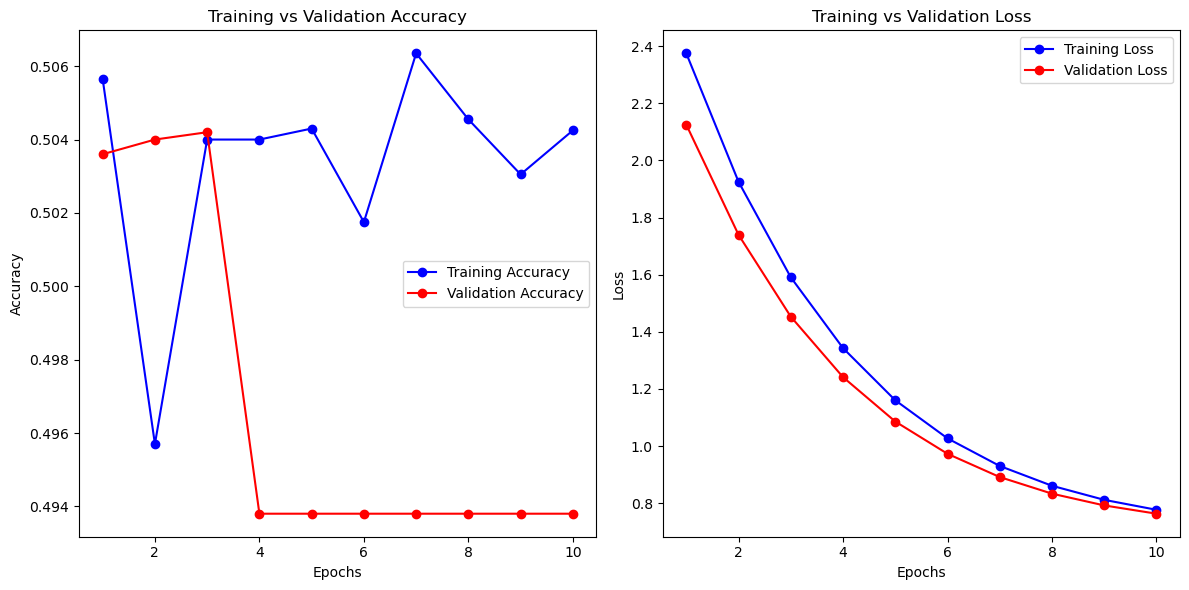

In [7]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
history_dict = history.history
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


Expected Outcome:

A trained RNN model that can classify movie reviews into positive or negative sentiments, with an accuracy metric provided at the end of the training process.

In [12]:
# Predict sentiment for a single review
def predict_sentiment(model, review, word_index):
    # Tokenize and preprocess the input review
    words = review.split()
    encoded_review = [word_index.get(word, 0) for word in words]
    padded_review = pad_sequences([encoded_review], maxlen=max_words, padding='post', truncating='post')

    #print(padded_review)
    # Predict sentiment
    #print(model.predict(padded_review))
    prediction = model.predict(padded_review)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    return sentiment, prediction

word_index = imdb.get_word_index()  # Load word-to-index mapping
review = "The move is very bad. Worst movie"
sentiment, confidence = predict_sentiment(model, review, word_index)
print(f"Sentiment: {sentiment}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Sentiment: Positive, Confidence: 0.50


    Conclusion:
    I observed that the above RNN model is not behaving as expected when I follow the instructions given in the assignment.
    With this assignment, I am am able to do hands-on the RNN